In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
print(df.columns.tolist())


['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [26]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True, errors='ignore')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
df.shape

(10000, 11)

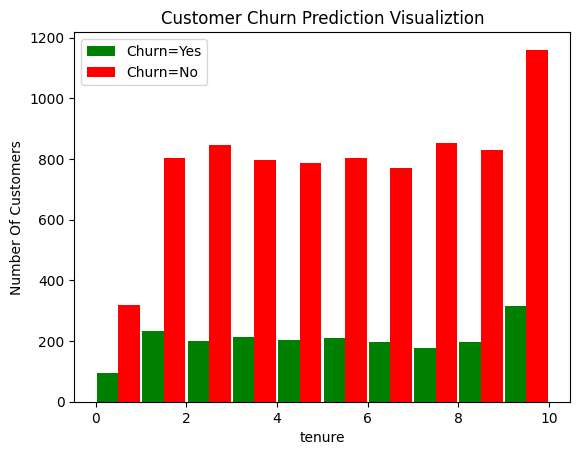

In [29]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


In [30]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [31]:
print_unique_col_values(df)


Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [32]:
df.replace({'Female': 1,'Male': 0},inplace=True)
df.head()

/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_9686/1664682949.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Female': 1,'Male': 0},inplace=True)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df1 = pd.get_dummies(df, columns=['Geography'], dtype=int)
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [36]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [40]:
cols_to_scale = ['CreditScore','Age','Balance','EstimatedSalary', 'Tenure', 'NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [41]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [42]:
X = df1.drop('Exited', axis='columns')
y = df1.Exited

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [45]:
X_train[:10]


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,0.672,0,0.189189,0.6,0.000000,0.333333,1,1,0.895494,1,0,0
1561,0.564,0,0.324324,0.4,0.476786,0.333333,1,1,0.979930,0,1,0
1670,0.418,0,0.081081,0.3,0.457317,0.000000,1,0,0.429438,0,0,1
6087,0.422,1,0.121622,0.9,0.540606,0.000000,1,0,0.765417,1,0,0
6669,0.334,0,0.513514,0.9,0.566554,0.000000,0,0,0.197401,1,0,0
5933,0.438,0,0.310811,0.4,0.479252,0.000000,1,0,0.815770,1,0,0
8829,0.666,1,0.297297,0.1,0.000000,0.333333,0,0,0.378788,1,0,0
7945,0.818,1,0.364865,0.8,0.000000,0.333333,1,1,0.496246,1,0,0
3508,0.152,1,0.216216,0.3,0.000000,0.333333,1,1,0.306125,1,0,0
2002,0.502,0,0.756757,0.2,0.000000,0.333333,0,1,0.257740,1,0,0


In [46]:
len(X_train.columns)


12

In [48]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(12,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') 

])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100) 

Epoch 1/100


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.7876 - loss: 0.5244
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8103 - loss: 0.4475
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8237 - loss: 0.4099
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8318 - loss: 0.3947
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.8496 - loss: 0.3602
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8602 - loss: 0.3512
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8679 - loss: 0.3294
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8580 - loss: 0.3366
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.8588 - loss: 0.3420
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8586 - loss: 0.3395
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8552 - loss: 0.3396
Epoch 12/100
250/250 ━━━━━━━━━━

In [49]:
model.evaluate(X_test, y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8596 - loss: 0.3634


[0.37574514746665955, 0.8575000166893005]

In [51]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.00041743],
       [0.00589614],
       [0.0373261 ],
       [0.01240325],
       [0.13172345]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [53]:
y_pred[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [54]:
y_test[:10]


6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.71      0.47      0.56       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

